In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import os

In [2]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage")

In [3]:
d10LVM_LRTable_file = "LshCas13a_d10LVM/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
EcC3000_5_min_LRTable_file = "LshCas13a_5_min/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
EcC3000_M13_LRTable_file = "LshCas13a_M13_infection/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
in_vitro_total_RNA_file = "LshCas13a_in_vitro_total_RNA/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
EcC3000_60_min_LRTable_file = "LshCas13a_C3000/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"

In [4]:
d10LVM_LRTable = pd.read_csv(d10LVM_LRTable_file, sep="\t")
d10LVM_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_5_min_LRTable = pd.read_csv(EcC3000_5_min_LRTable_file, sep="\t")
EcC3000_5_min_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_M13_LRTable = pd.read_csv(EcC3000_M13_LRTable_file, sep="\t")
EcC3000_M13_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

in_vitro_total_RNA = pd.read_csv(in_vitro_total_RNA_file, sep="\t")
in_vitro_total_RNA.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_60_min_LRTable = pd.read_csv(EcC3000_60_min_LRTable_file, sep="\t")
EcC3000_60_min_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

In [5]:
top_N = 100

In [16]:
d10LVM_LRTable_set = ["_".join([str(i[0]), i[1]])
                     for i in zip(d10LVM_LRTable.query("logFC > 0").head(top_N)["Pos"].tolist(),
                                  d10LVM_LRTable.query("logFC > 0").head(top_N)["Strand"].tolist())]
d10LVM_LRTable_set = set(d10LVM_LRTable_set)

In [7]:
EcC3000_5_min_set = ["_".join([str(i[0]), i[1]]) 
                     for i in zip(EcC3000_5_min_LRTable.query("logFC > 0").head(top_N)["Pos"].tolist(), 
                                  EcC3000_5_min_LRTable.query("logFC > 0").head(top_N)["Strand"].tolist())]
EcC3000_5_min_set = set(EcC3000_5_min_set)

In [8]:
EcC3000_M13_set = ["_".join([str(i[0]), i[1]]) 
                   for i in zip(EcC3000_M13_LRTable.query("logFC > 0").head(top_N)["Pos"].tolist(), 
                                EcC3000_M13_LRTable.query("logFC > 0").head(top_N)["Strand"].tolist())]
EcC3000_M13_set = set(EcC3000_M13_set)

In [9]:
in_vitro_total_RNA_set = ["_".join([str(i[0]), i[1]]) 
                          for i in zip(in_vitro_total_RNA.query("logFC > 0").head(top_N)["Pos"].tolist(), 
                                       in_vitro_total_RNA.query("logFC > 0").head(top_N)["Strand"].tolist())]
in_vitro_total_RNA_set = set(in_vitro_total_RNA_set)

In [10]:
EcC3000_60_min_set = ["_".join([str(i[0]), i[1]]) 
                      for i in zip(EcC3000_60_min_LRTable.query("logFC > 0").head(top_N)["Pos"].tolist(), 
                                   EcC3000_60_min_LRTable.query("logFC > 0").head(top_N)["Strand"].tolist())]
EcC3000_60_min_set = set(EcC3000_60_min_set)

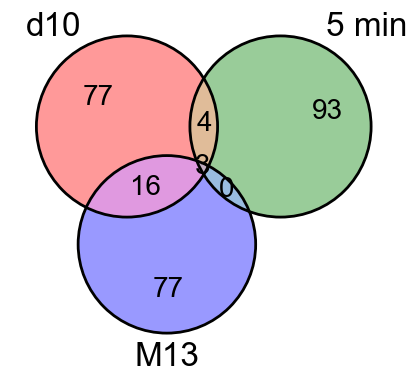

In [11]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,5))

venn_plot = venn3(subsets=[d10LVM_LRTable_set, EcC3000_5_min_set, EcC3000_M13_set],
                 set_labels=["d10", "5 min", "M13"])
venn_circles = venn3_circles(subsets=[d10LVM_LRTable_set, EcC3000_5_min_set, EcC3000_M13_set])

figure.savefig("TCS_intersection/Results/Pictures/venn3_plot.png")

In [12]:
from functools import reduce

In [14]:
df_list = [d10LVM_LRTable.loc[d10LVM_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]],
          EcC3000_5_min_LRTable.loc[EcC3000_5_min_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]],
          EcC3000_M13_LRTable.loc[EcC3000_M13_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]], 
          in_vitro_total_RNA.loc[in_vitro_total_RNA.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]]]
MergedDFs = reduce(lambda left, right: pd.merge(left, right, how="inner", on = ["SeqID", "Pos", "Strand"]), df_list)
MergedDFs
#MergedDFs.to_csv("TCS_intersection/Results/Pictures/d10_WT5_WTM13_in_vitro_total_RNA_common_8_TCS.tsv", sep="\t")

/tmp/ipykernel_32506/3884979572.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MatchedFeatureGene_x', 'MatchedFeatureType_x'} in the result is deprecated and will raise a MergeError in a future version.
  MergedDFs = reduce(lambda left, right: pd.merge(left, right, how="inner", on = ["SeqID", "Pos", "Strand"]), df_list)


,SeqID,Pos,Strand,MatchedFeatureType_x,MatchedFeatureGene_x,MatchedFeatureType_y,MatchedFeatureGene_y,MatchedFeatureType_x,MatchedFeatureGene_x,MatchedFeatureType_y,MatchedFeatureGene_y
0,NC_000913.3,4175421,+,tRNA,thrU,tRNA,thrU,tRNA,thrU,tRNA,thrU
1,NC_000913.3,780588,+,tRNA,lysT,tRNA,lysT,tRNA,lysT,tRNA,lysT


In [23]:
set.intersection(d10LVM_LRTable_set, EcC3000_5_min_set, EcC3000_M13_set)

{'4175421_+', '780587_+', '780588_+'}

In [25]:
#TODO: add intersection with in vitro data and WT
#venn4?? venn5?

from venn import venn

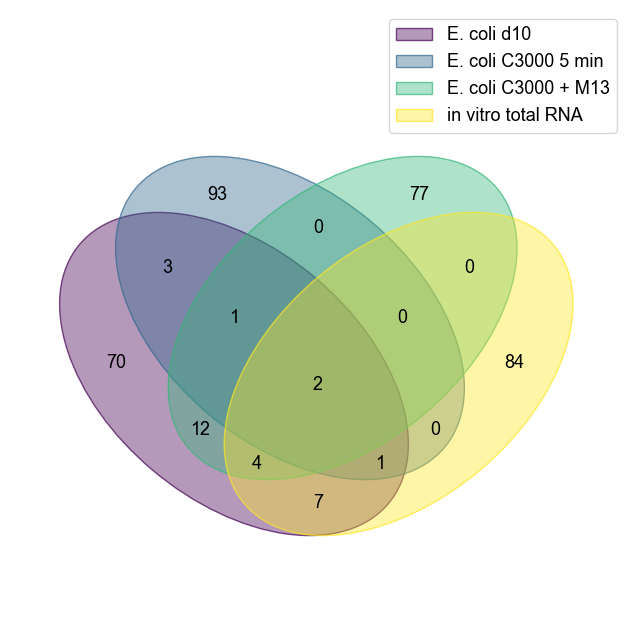

In [26]:
dataset_dict = {"E. coli d10" : d10LVM_LRTable_set, 
                 "E. coli C3000 5 min": EcC3000_5_min_set, 
                 "E. coli C3000 + M13" : EcC3000_M13_set, 
                 "in vitro total RNA" : in_vitro_total_RNA_set}
venn(dataset_dict)

plt.savefig("TCS_intersection/Results/Pictures/venn4_plot.png")

<AxesSubplot:>

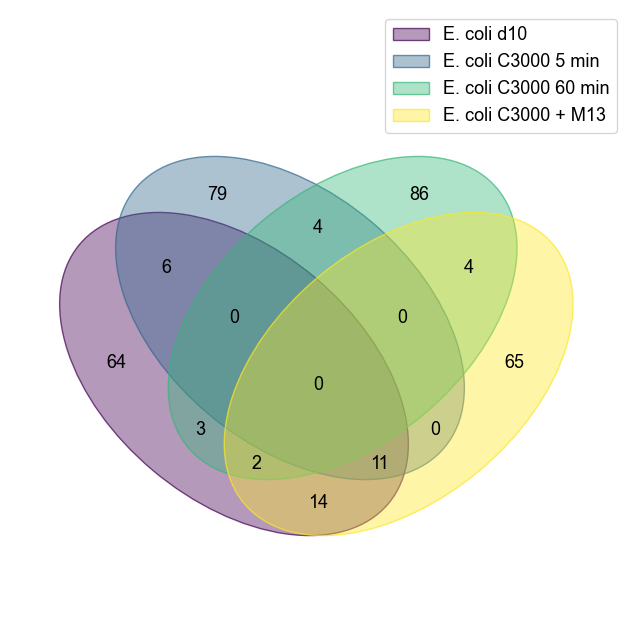

In [51]:
dataset_dict_six_samples = {"E. coli d10" : d10LVM_LRTable_set, 
                            "E. coli C3000 5 min" : EcC3000_5_min_set, 
                            "E. coli C3000 60 min" : EcC3000_60_min_set,
                            "E. coli C3000 + M13" : EcC3000_M13_set, 
                            "in vitro total RNA" : in_vitro_total_RNA_set}
venn(dataset_dict_six_samples)

In [42]:
?venn